In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

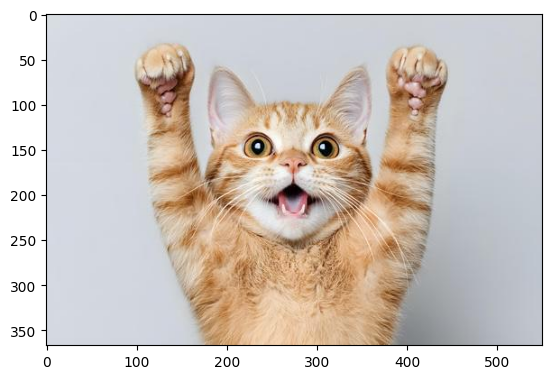

In [3]:
image_data = mpimg.imread('cat.jpg')
plt.imshow(image_data)

In [4]:
def converter(img):
    height = len(img)
    width = len(img[0])
    points = []
    for y in range(height):
        for x in range(width):
            pixel = img[y][x]
            r = pixel[0]
            g = pixel[1]
            b = pixel[2]
            points.append([x, y, r, g, b])
    return points
points = converter(image_data)
points = np.array(points, dtype=float)

In [5]:
def convert_back(smth):
    x = smth[:, 0]
    y= smth[:, 1]
    colors = smth[:, 2:5]

    if colors.max() > 1.0:
        colors = colors / 255.0

    plt.scatter(x, -y, c=colors)
    plt.axis('equal')
    plt.show()

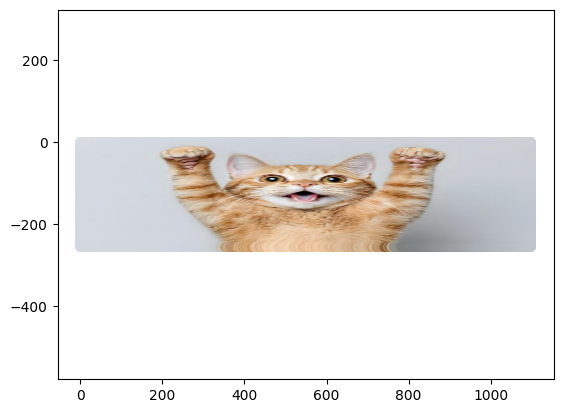

In [6]:
def stretch(points, a, b):
    A = np.array([
        [a, 0, 0, 0, 0],
        [0, b, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

stretched = stretch(points, 2, 0.7)

convert_image=convert_back(stretched)

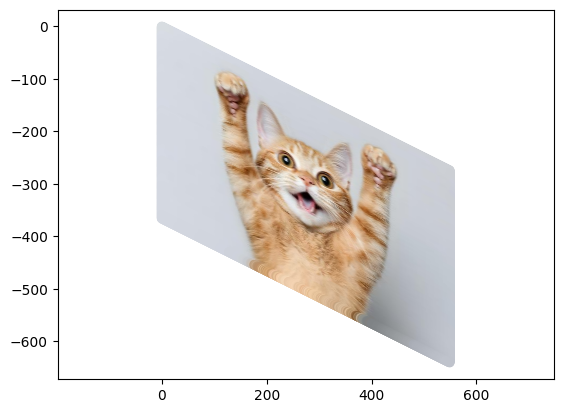

In [7]:
def shear(points, a, b):
    A = np.array([
        [1, a, 0, 0, 0],
        [b, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

shearted = shear(points, 0.5, 0)

shearted_image=convert_back(shearted)

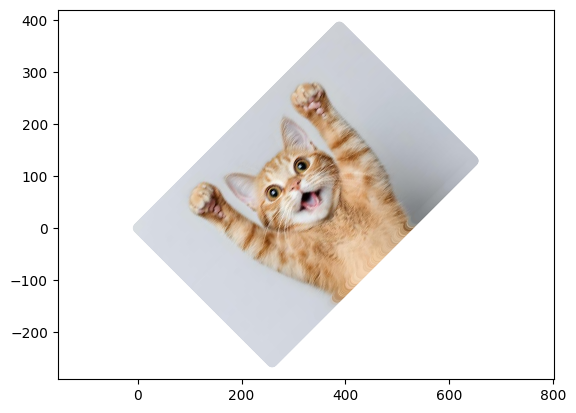

In [8]:
def rotation(points, teta):
    teta = np.deg2rad(teta)
    A = np.array([
        [np.cos(teta), -np.sin(teta), 0, 0, 0],
        [np.sin(teta), np.cos(teta), 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

rot = rotation(points, 45)

rotated_image=convert_back(rot)

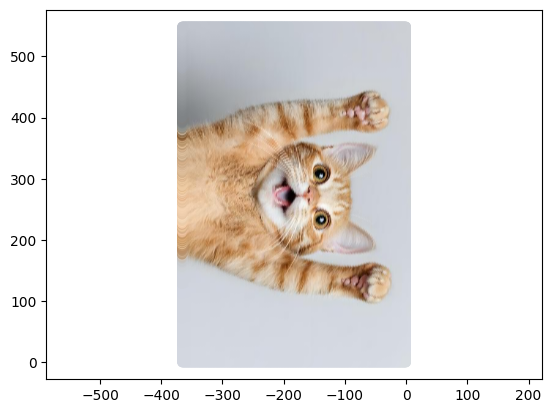

In [9]:
def reflection(points, a, b):
    A2 = np.array([
        [a**2 - b**2, 2*a*b],
        [2*a*b, b**2 - a**2]
    ], dtype=float) / (a**2 + b**2)
    A = np.array([
        [A2[0,0], A2[0,1], 0, 0, 0],
        [A2[1,0], A2[1,1], 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

ref = reflection(points, 1, -1)
reflected_image=convert_back(ref)

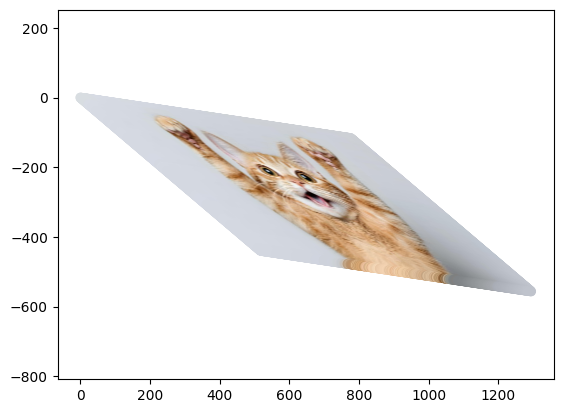

In [19]:
stretched_rotation = stretch(rot, 2.0, 0.7)
shear_stretch_rot=shear(stretched_rotation, 0.5, 0)
convert_back(shear_stretch_rot)

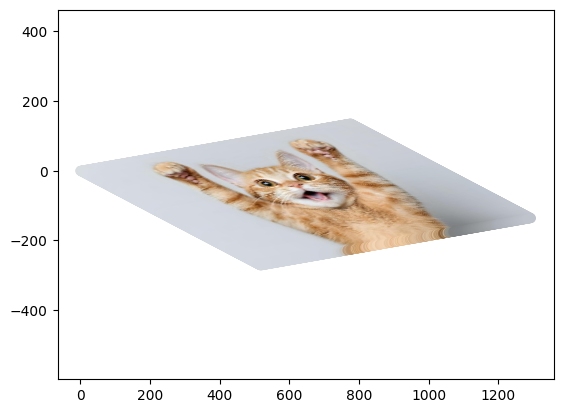

In [20]:
shear_rotation = shear(rot, 0.5, 0)
stretch_shear_rot=stretch(shear_rotation, 2.0, 0.7)
convert_back(stretch_shear_rot)

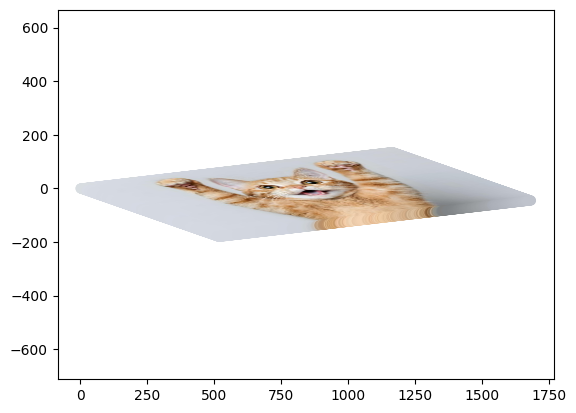

In [21]:
rot_shear=rotation(shearted, 45)
rot_shear_stretch=stretch(rot_shear, 2.0, 0.7)
convert_back(rot_shear_stretch)

In [48]:
def read_off(filename: str):
    with open(filename, 'r') as f:
        if 'OFF' != f.readline().strip():
            raise ValueError('Not a valid OFF header')
        n_verts, n_faces, _ = map(int, f.readline().strip().split())
        verts = [list(map(float, f.readline().strip().split())) for _ in range(n_verts)]
        faces = [list(map(int, f.readline().strip().split()[1:])) for _ in range(n_faces)]
        return np.array(verts), faces

vertices, faces = read_off(r"C:\Users\Inna\Downloads\archive (1)\ModelNet40\toilet\test\toilet_0349.off")

print(vertices.shape)
print(faces[:3])
print(vertices)

(6132, 3)
[[0, 1, 2], [1, 0, 3], [8, 9, 10]]
[[ 8.63051  13.8698   14.450024]
 [ 8.49998  13.87836  13.700024]
 [ 8.49998  13.87836  14.450024]
 ...
 [ 3.88027   6.76595   0.100023]
 [ 2.31277   6.76595  -0.399977]
 [ 2.31277   6.76595   0.100023]]


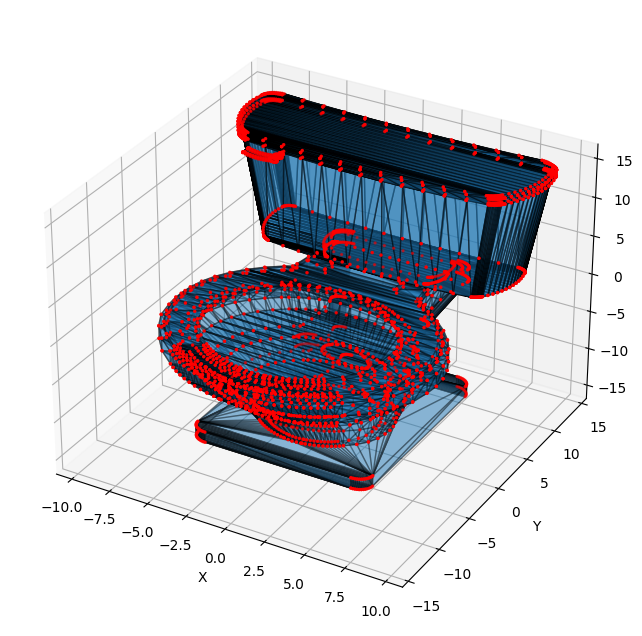

In [49]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_off(vertices, faces):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection([vertices[face] for face in faces],
                            alpha=0.3, edgecolor='k')
    ax.add_collection3d(mesh)
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=2, c='r')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    plt.show()

plot_off(vertices, faces)


[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


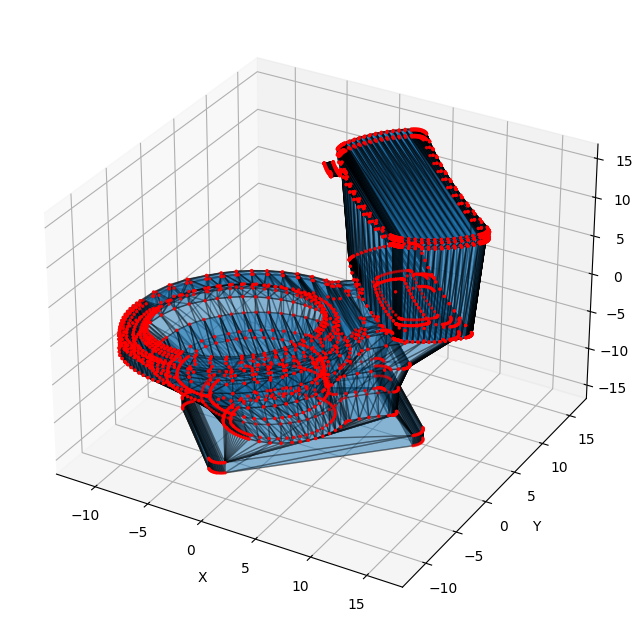

In [52]:
def rotate_xy(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ np.cos(theta), -np.sin(theta), 0],
        [ np.sin(theta),  np.cos(theta), 0],
        [ 0,              0,             1]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new

plot_off(rotate_xy(vertices, 45), faces)

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


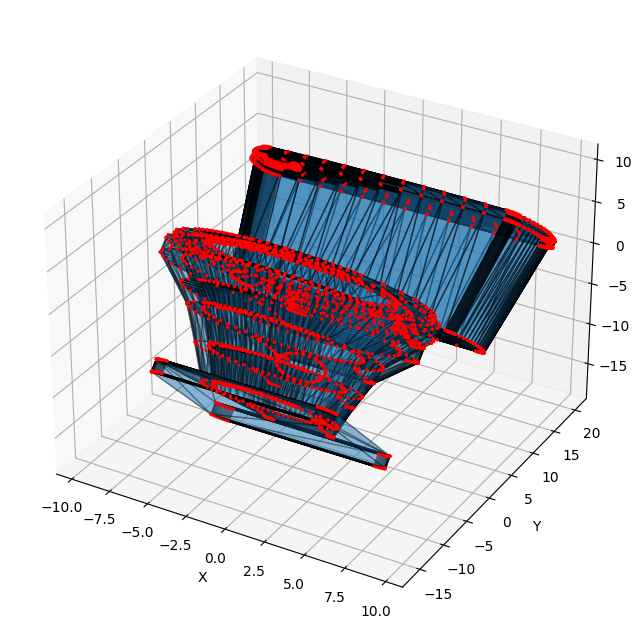

In [53]:
def rotate_yz(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ 1, 0,              0],
        [ 0, np.cos(theta), -np.sin(theta)],
        [ 0, np.sin(theta),  np.cos(theta)]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new

plot_off(rotate_yz(vertices, 45), faces)

[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


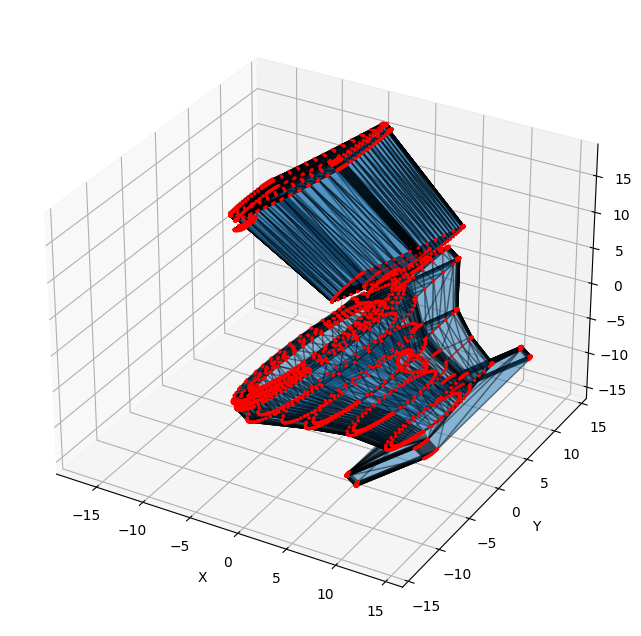

In [54]:
def rotate_xz(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ np.cos(theta), 0, np.sin(theta)],
        [ 0,             1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new

plot_off(rotate_xz(vertices, 45), faces)